# **- Machine Learning -**
# _* Linear Regression *_
### **_+ Advertising Data - Credit Data - Auto Data +_**

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Advertising Data **:**

In [2]:
df = pd.read_csv('Advertising.csv' , index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [3]:
df.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [110]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

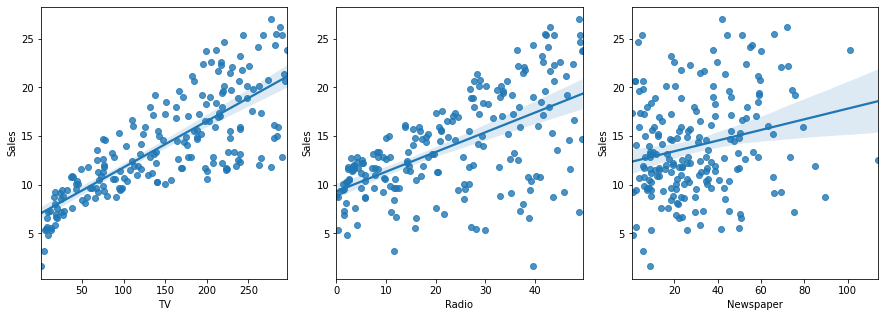

In [3]:
fig = plt.figure(figsize=(15 , 5))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.regplot(ax=ax1, x='TV', y='Sales', data=df)
sns.regplot(ax=ax2, x='Radio', y='Sales', data=df)
sns.regplot(ax=ax3, x='Newspaper', y='Sales', data=df)

Yukarıda gördüğümüz gibi, **Newspaper**'e verilen reklamın Satışta ki etkisi biraz düşündürücü...

+ Aşağıdaki, **``sns.pairplot( )``** fonksiyonu ile de, her bir kolonun kendi aralarındaki ikili ilişkileri görebiliyoruz **:**

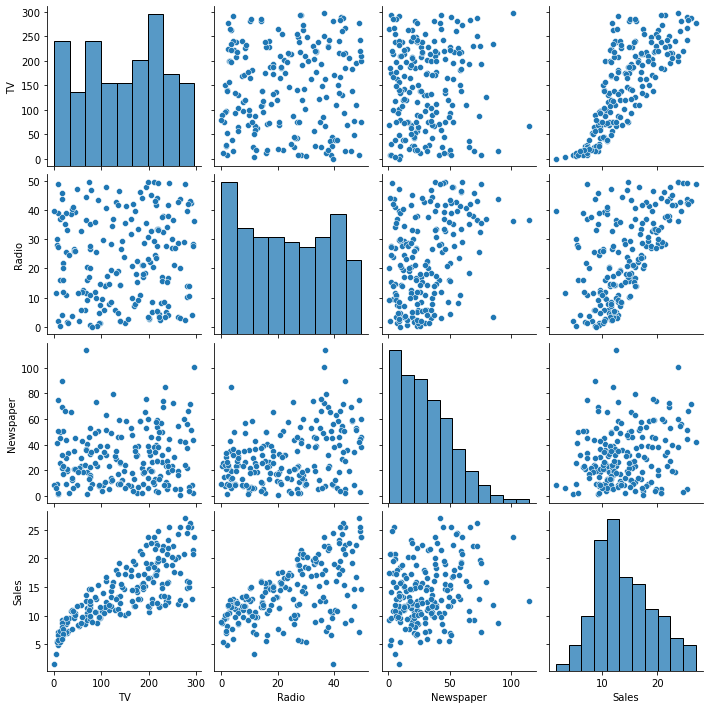

In [6]:
sns.pairplot(df)

Yukarıda gördüğümüz gibi öncelikle **TV** reklamları ve **Satış** arasında güçlü bir ilişki var, eğim daha fazla...
<br> Aynı zamanda mesela, **Radio** ile **Newspaper** kolonlarının **kendi** aralarındaki korelasyonlarına bakalım. İdeal olanı, bu iki kolonun aralarında bir etkinin olmamasını yani korelasyonlarının çok düşük olmasını isteriz. Çünkü **her bir BETA ( $\beta$ )**'nın **bağımsız (independent)** olarak etkisini görmek istiyoruz... Aralarında bir korelasyon olursa bu kolonların etkisi birbirine karışıyor ve istediğimiz sonucu alamıyoruz...
<br> Eğer aralarında korelasyon yoksa, veriler olabildiğince **rassal (random)** şekilde dağılır.
<br> Ancak **Radio** ve **Newspaper** kolonlarına baktığımızda, aralarında az da olsa bir korelasyon varmış gibi görünüyor...

+ Şimdi de **KORELASYONLARINA** bakalım **:**

In [3]:
corr = df.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

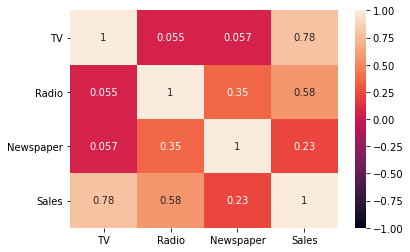

In [6]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, annot=True)

Evvet, yukarıda da gördüğümüz gibi **Radio** ile **Newspaper** arasında az da olsa bir korelasyon var (0.35)

In [8]:
df.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


---
---
--------->
### **Modelimizi Yaratalım (Kuralım) :**
<---------

---
---

+ Şimdi **, Lineer Regresyon Modelimizi** kurmak ve üzerinde çalışmalar yapmak için gerekli olan **modülleri çağırıyoruz :**

In [22]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

+ Öncelikle, **'x'**'leri ve **'y'**'leri birbirlerinden ayıralım **:**
<br> **+--- NOTE ---> 'X'**'lere FEATURE, **'y'**'lere de OUTPUT veya TARGET denir.

+ **'Sales'** kolonunu **düşürdüğümüzde**, geriye sadece FEATURE kolonları kalır **:**

In [5]:
X = df.drop('Sales', axis=1)
X.tail()

,TV,Radio,Newspaper
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2
200,232.1,8.6,8.7


+ **'Sales'** kolonu ise direkt TARGET kolonumuzdur **:**

In [6]:
y = df['Sales']
y.tail()

196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, dtype: float64

+ Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model **:**
+ Şimdi verileri bir **eğitim seti** ve bir **test seti** olarak ayıralım. Modeli eğitim setinde eğiteceğiz ve ardından modeli değerlendirmek için **hiç görmediği test setini** kullanacağız **:**

**+--- NOTE ---> X_train , X_test , y_train , y_test = train_test_split( )** içerisinde SHIFT + TAB tuşlarına basarsak, içerisine yazabileceğimiz özellikleri görebiliriz.
+ Verimizin **%20**'sini TEST verisi olarak ayırmak istiyoruz. Yani parantez içerisine **( test_size=0.2 )** yazmalıyız **:**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

+ Şimdi **RASTGELE (RANDOM)** bir şekilde **%20**'sini **TEST** verisi olarak seçtiğimiz **FEATURE ('X')** verilerimizi göstereceğiz **:**

In [32]:
X_test

,TV,Radio,Newspaper
1,230.1,37.8,69.2
147,240.1,7.3,8.7
159,11.7,36.9,45.2
177,248.4,30.2,20.3
198,177.0,9.3,6.4
83,75.3,20.3,32.5
76,16.9,43.7,89.4
86,193.2,18.4,65.7
81,76.4,26.7,22.3
158,149.8,1.3,24.3


+ Şimdi **RASTGELE (RANDOM)** bir şekilde **%80**'ini **TRAIN (EĞİTİM)** verisi olarak seçtiğimiz **FEATURE ('X')** verilerimizi göstereceğiz **:**

In [33]:
X_train

,TV,Radio,Newspaper
10,199.8,2.6,21.2
20,147.3,23.9,19.1
200,232.1,8.6,8.7
153,197.6,23.3,14.2
4,151.5,41.3,58.5
...,...,...,...
58,136.2,19.2,16.6
151,280.7,13.9,37.0
135,36.9,38.6,65.6
144,104.6,5.7,34.4


+ Şimdi de **%20** olarak RASTGELE seçtiğimiz FEATURE ('X') **TEST** değerlerine karşılık gelen **TARGET ('y')** değerlerini göstereceğiz **:**

In [18]:
y_test

1      22.1
147    13.2
159     7.3
177    20.2
198    12.8
83     11.3
76      8.7
86     15.2
81     11.8
158    10.1
72     12.4
96     16.9
139     9.6
110    19.8
148    25.4
193     5.9
127     6.6
17     12.5
88     16.0
104    14.7
178    11.7
128     8.8
12     17.4
114    15.9
95     11.5
141    10.9
171     8.4
14      9.7
70     22.3
106    19.2
82     12.3
131     1.6
161    14.4
55     20.2
38     14.7
133     5.7
65     18.0
152    11.6
52     10.7
154    19.0
Name: Sales, dtype: float64

+ Şimdi de **%80** olarak RASTGELE seçtiğimiz FEATURE ('X') **TRAIN (EĞİTİM)** değerlerine karşılık gelen **TARGET ('y')** değerlerini göstereceğiz **:**

In [19]:
y_train

10     10.6
20     14.6
200    13.4
153    16.6
4      18.5
       ... 
58     13.2
151    16.1
135    10.8
144    10.4
112    21.8
Name: Sales, Length: 160, dtype: float64

#### **Creating and Training the Model (Modelin Oluşturulması ve Eğitimi)**

+ **En baştan, doğru bir şekilde yapıyoruz :**
+ Lineer Regresyonun bütün özelliklerini, metodlarını, fonksiyonlarını, ... kullanabileceğimiz **;** **Lineer Regresyondan bir 'OBJE'** yaratacağız. Bu objenin adına da **'lm'** diyelim **:**

In [8]:
lm = LinearRegression()

+ **Şimdi artık SADECE EĞİTİM (train) verilerini FIT edeceğiz :**

In [9]:
lm.fit(X_train, y_train)

LinearRegression()

In [10]:
lm.coef_

array([ 0.04376936,  0.19767522, -0.00187394])

In [11]:
lm.intercept_

3.0865202625382295

Yukarıda değer **, BETA-0 ( $\beta_{0}$ )** değerimizdir.

+ Modelin TEST setindeki **performansını** hesaplayalım **:**
<br> **$R^2$ :**

In [12]:
lm.score(X_test , y_test)

0.8266375240641092

**++++ CTIRICAL NOTE ++++**
<br> Yani yukarıdaki **lm.score( X_test , y_test )** kodu ile **; 'X'-TEST** verilerini alıp, sonra **EĞİTTİĞİ katsayıları ( lm.coef_ )** da kullanarak **tahmin değerlerini (prediction)** hesaplıyor... SONRA DA **GERÇEK 'y'-TRAIN** değerlerine bakıp, nasıl bir **performans** gösterdiğini değerlendiriyor...

+ Şimdi de **FEATURE ('X')-TEST** verilerini kullanarak bir **tahminleme** yaplım. Çünkü **modelimiz** henüz TEST verilerini **görmedi** ve hiç görmediği veriler üzerinde bir **tahminleme** yapmasını istiyoruz **:**
<br> Ve bunu **'predictions'** ismini verdiğimiz bir objeye atayalım **:**

In [13]:
predictions = lm.predict(X_test)
predictions

array([20.50029784, 15.0222705 , 10.80813551, 19.89058115, 12.66008412,
       10.3342574 , 12.2970996 , 15.05686774, 11.66663932,  9.8546121 ,
       10.65974828, 16.38146313, 10.04997546, 19.57237277, 23.33430011,
        4.59060526, 11.02266616, 13.07536724, 15.83897   , 14.67725415,
       12.01197015,  6.57958304, 17.2205124 , 16.31263748, 10.53437718,
        9.63549659,  7.53354059,  8.84287262, 21.20268962, 18.18388355,
       14.32373388, 10.9287944 , 14.15712722, 20.24798308, 16.03560879,
        8.82701373, 17.23102665,  9.95182437,  9.37190041, 18.36127123])

+ **Comparison (Karşılaştırma) :**
<br> **Gerçek test verileri (y_Test)** ile **tahminleme yaptığımız text verilerini (X_test) karşılaştıralım :**

In [14]:
comp = pd.DataFrame({'Actual' : y_test , 'Predicted' : predictions})
comp.tail()

,Actual,Predicted
133,5.7,8.827014
65,18.0,17.231027
152,11.6,9.951824
52,10.7,9.371900
154,19.0,18.361271


Yukarıdaki tabloya bakarak, buradan çok kolay bir şekilde **SSE (same of squared error)**'yi veya **MSE (mean square error)**'yi hesaplayabiliriz...

+ Şimdi bir tane **Histogram** çizdirelim ve yorumlayalım **:**
<br> Gerçek değerler ile tahminlerin arasındaki FARKLARIN (**error**'ların) Histogramını çizdirelim **:**

<AxesSubplot:xlabel='Sales', ylabel='Count'>

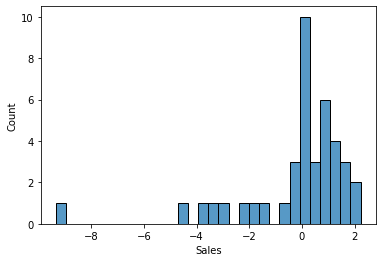

In [15]:
sns.histplot(y_test - predictions, bins=30)

**Hatamızın, Normal Dağılım şeklinde dağılmasını isteriz !!!**
<br> Çünkü modelimizin çok büyük hataları çok fazla yapmasını istemeyiz... Büyük hataların, olabildiğince küçük olması lazım...
<br> **'0'**'ın çevresindeki hata sayısı daha çok olabilir... Ama **'0'**'dan uzaklaştıkça hataların azalmasını isteriz... Bu da bize **curve (eğri, kavis)** şeklinde bir grafik verir... Yani bu şekilde bir grafik olmasını isteriz... İyi bir model bu şekilde olur...
<br> Eğer **Normal Dağılım** şeklinde bir grafik oluşmuyorsa modelimiz bir şeyleri kaçırıyor demektir. Bir yerlerde daha fazla hata yapıyor demektir... O zaman açıklayabileceğimiz bazı şeyler var, ve modelimiz o konuda yetersiz kalıyor demektir...

+ Şimdi de **HATA metriklerini** görelim **:**

In [33]:
print( 'MAE : ' , metrics.mean_absolute_error(y, predictions) )
print( 'MSE : ' , metrics.mean_squared_error(y, predictions) )
print( 'RMSE : ' , np.sqrt(metrics.mean_squared_error(y, predictions)) )

ValueError: Found input variables with inconsistent numbers of samples: [200, 40]

+ Yukarıda bir **ValueError** aldık. Çünkü '**y**' ile '**predictions**''u karşılaştırmaya çalıştık ama bu **yanlış**... Çünkü '**y**' ve '**predictions**' veri grupları birbirleriyle aynı sayıda elemana sahip DEĞİL...
<br> Aynı zamanda modelimizin, **hiç görmediği** veri setleri üzerinde bir karşılaştırma yapmak istiyoruz **:**
<br> Yani **TEST** setindeki **GERÇEK DEĞERLER (y_test)** ile, **TEST** setindeki yapmış olduğum **TAHMİNLER ( lm.predict(X_test) )** arasında bir karşılaştırma yapmak istiyoruz **:**

In [16]:
print( 'MAE : ' , metrics.mean_absolute_error(y_test, predictions) )
print( 'MSE : ' , metrics.mean_squared_error(y_test, predictions) )
print( 'RMSE : ' , np.sqrt(metrics.mean_squared_error(y_test, predictions)) )

MAE :  1.3409774291262115
MSE :  4.535785391880799
RMSE :  2.1297383388296316


**+--- NOTE ---> MSE** bize teorik olarak **;** **ortalamada**, bir tahminde ne kadarlık hata yaptığımızın **karesini** söyler. Ancak bu tek başına doğrudan bir işe yaramaz... Bu başka şeyleri karşılaştırmak istediğimiz zaman bir şey ifade eder...

**+--- NOTE ---> SCORE** hesabı yaparken **; $R^2$** de bir skor **,** 'MAE' **-** 'MSE' **-** 'RMSE''ler de bir skordur. Ancak **Linear Regression**'da, **Scikit Learn** skor için DEFAULT olarak **$R^2$**'yi kullanır. ( **lm.score( , )** )
<br> Farklı modellerde SCORE için DEFAULT olarak başka bir metrik kullanılabilir ama **Lineer Rregresyon**'da bu şekilde tanımlanmıştır...
+ Ama tabii metriklerde (metrics) de **$R^2$**'yi bulabiliriz... ( **metrics.r2_score( , )** ) **:**

In [17]:
lm.score(X_test , y_test)

0.8266375240641092

In [19]:
print( 'R^2 : ' , metrics.r2_score(y_test , predictions) )

R^2 :  0.8266375240641092


**+--- NOTE ---> R Square ($R^2$)** bize **varyans**'ın ne kadarını açıkladığını söyler. **'1''e ne kadar yakın ise o kadar iyi olmuş oluyor**... Ama bu da bize tek başına çok fazla bir şey ifade etmez. Başka modeller ile karşılaştırdığımızda, daha çok şey ifade eder...

**++++ CRITICAL NOTE ++++**
<br> Bu yukarıdaki metrik sonuçları **tek bir model için** pek bir şey ifade etmiyor... Ancak **farklı farklı modeller** kurmaya başladığımız zaman, hangisinin daha iyi bir performans gösterdiğine dair bir karşılaştırma yapabiliyoruz...

---
---

--------->
#### **Linear Regression**
+ **Yani, DOĞRUSUNU yaptığımız süreçte SIRASI ile ;**
+ + **pd.read_...( " " , )** fonksiyonu ile Veri Setimizi **çağırıyoruz ,**
+ + Veri Setimizi **düzenliyoruz**. Eksik ve gereksiz verileri, kolonları, satırları, ... bulup üzerlerinde düzeltmeler yapıyoruz **,**
+ + **Numpy, Pandas, Matplotlib ve Seaborn** kütüphaneleri ile veri setimizi **gözlemleyip, yorumlar yapıyoruz ,**
+ + Veri Setimizin **kolonları arasındaki 'Korelasyonlara'** bakıyoruz **:** ( **df.corr()** ) **,**
+ + **'X'**'leri ve **'y'**'leri (yani FEATURE ve TARGET kolonlarını) birbirlerinden **ayırıyoruz ,**
+ + Veri Setini **;** ( **X_train , X_test , y_train , y_test** ) olarak **parçalamak** için **:**
+ + + Öncelikle **modülünü çağırmamız** gerekiyor **:** ( **from sklearn.model_selection import train_test_split** ) **,**
+ + + Sonra da **TRAIN - TEST** diye **parçalamak** için **:** ( **X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=... , random_state=... )** ) **.**
+ + Modeli **kuruyoruz (instance yaratıyoruz) :** ( **lm = LinearRegression()** ) **,**
+ + Modeli **FIT** ediyoruz. Yani **TRAIN** kolonlarını **Eğitiyoruz :** ( **lm.fit(X_train , y_train)** ) **,**
+ + Modelimizin **performansına** bakıyoruz. Yani Eğittiğimiz Modelin, **TEST** kolonları üzerindeki performansına bakıyoruz **: $R^2$ =** ( **lm.score(X_test , y_test)** ) **,**
+ + **Tahminleme** yapıyoruz. Yani **Eğitim sonrasında** ortaya çıkan **Coefficient (Katsayı)**'ları da kullanarak **TEST** Veri Seti üzerinde **Tahminleme** yapıyoruz **:** ( predictions **= lm.predict(X_test)** ) **,**
+ + **X_test** verileri üzerinde yaptığımız TAHMİNİN (**predictions**) sonuçları ile GERÇEK test verisi **(y_test)** sonuçlarını, gözlemlemek için **karşılaştırıyoruz (Comparison) :** ( comp **= pd.DataFrame( {'Actual' : y_test , 'Predicted' : predictions} )** ) **,**
+ + Modelimizin **Normal Dağılım** şeklinde olup olmadığını görmek ve yorumlamak için **; Gerçek** değerler ile **Tahminlerin** arasındaki FARKLARIN (**error**'ların) **Histogramını** çizdiriyoruz **:** ( **sns.histplot( (y_test - predictions) , bins=... )** ) **,**
+ + Farklı **metrikleri, hataları** hesaplıyoruz **:**
+ + + print( 'MAE :' , **metrics.mean_absolute_error( y_test , lm.predict(X_test) )** )
<br> print( 'MSE :' , **metrics.mean_squared_error( y_test , lm.predict(X_test) )** )
<br> print( 'RMSE :' , **np.sqrt( metrics.mean_squared_error( y_test , lm.predict(X_test) )** )
<br> print( 'R^2 :' , **metrics.r2_score( y_test , lm.predict(X_test)** )
<br> **. . .**

<---------

---
---

**++++ CRITICAL NOTE ++++**
<br> **Linear Regression**'un kendi içerisinde bir **rassallık olmadığı için**, AYNI veri seti içerisinde farklı verileri seçsek de yine aynı sonuçları verecektir... Yani her tekrar çalıştırmamızda (FIT ettiğimizde) yine aynı sonuçları alırız... ANCAK veri setini ayırırken **( random_state= )** değerini değiştirirsek bu defa farklı sonuçlar alabiliriz...
<br> **( random_state= )** değerini HEP AYNI seçmemizin sebebi de, FARKLI MODELLER seçtiğimizde de hep aynı veri kümeleri üzerinde çalışıp en iyi sonucu aralarından seçebilmektir!
<br> Tabii ki ileride **( random_state= )** değerlerini değiştirerek de çalışmalar yapacağız...

---
---
---
---

## Credit Card Data **:**

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [3]:
df = pd.read_csv('Credit_Data.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


In [26]:
df.tail()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
ID,,,,,,,,,,,
396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
397,13.364,3838,296,5,65,17,Male,No,No,African American,480
398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0
400,18.701,5524,415,5,64,7,Female,No,No,Asian,966


Yukarıda, 400 müşterimizin kredi kartı harcamaları vardır. **Income, Limit, Balance** kolonlarını **;** **DOLAR($)** cinsinden düşünebiliriz...
<br> **'Income'** kolonu, geliri gösterir.
<br> **'Limit'** kolonu, kart limitini gösterir.
<br> **'Rating'** kolonu, kredi history reytingini gösterir.
<br> **'Cards'** kolonu, kaç tane kredi kartı olduğunu gösterir.
<br> **'Age'** kolonu, kart sahibinin yaşını gösterir.
<br> **'Education'** kolonu, kaç yıl okul okuduğunu gösterir.
<br> **'Gander'** kolonu, cinsiyetini gösterir.
<br> **'Student'** kolonu, öğrenci olup olmadığını gösterir.
<br> **'Married'** kolonu, evli olup olmadığını gösterir.
<br> **'Ethnicity'** kolonu, etnik kökenini gösterir.
<br> **'Balance'** kolonu da, ne kadar harcaması olduğunu gösterir.

Biz bu **Feature** kolonlarını kullanarak **'Balance' (Target)** kolonunu tahmin etmek istiyoruz... Gördüğümüz gibi bu bir REGRESSION problemidir ve bir LINEAR REGRESSION modeli kuracağız...
+ Linear Regression modeli kurarken KATEGORIK (object) olan kolonları **kullanamayız**... Bunları NUMERIK hale çevirmemiz gerekiyor. Bunun için de **``.get_dummies( )``** fonksiyonunu kullanacağız **:**
<br> **+--- NOTE --->** NUMERIK hale çevirmek için farklı yöntemler var. Biz sadece bir tanesini kullanacağız.

In [4]:
dummies = pd.get_dummies(df[['Gender' , 'Student' , 'Married' , 'Ethnicity']])

In [5]:
dummies

,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
ID,,,,,,,,,
1,0,1,1,0,0,1,0,0,1
2,1,0,0,1,0,1,0,1,0
3,0,1,1,0,1,0,0,1,0
4,1,0,1,0,1,0,0,1,0
5,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
396,0,1,1,0,0,1,0,0,1
397,0,1,1,0,1,0,1,0,0
398,1,0,1,0,0,1,0,0,1


Yukarıda gördüğümüz gibi, her bir KATEGORİ için birer **dummy değişkeni (kolonu)** üretti... Artık ileride modelimize bunu ekleyebiliriz...

In [6]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Gender_Female               400 non-null    uint8
 1   Gender_Male                 400 non-null    uint8
 2   Student_No                  400 non-null    uint8
 3   Student_Yes                 400 non-null    uint8
 4   Married_No                  400 non-null    uint8
 5   Married_Yes                 400 non-null    uint8
 6   Ethnicity_African American  400 non-null    uint8
 7   Ethnicity_Asian             400 non-null    uint8
 8   Ethnicity_Caucasian         400 non-null    uint8
dtypes: uint8(9)
memory usage: 6.6 KB


+ **TARGET (hedef) ('y')** kolonunu tanımlayın **:**

In [30]:
y = df.Balance

+ DROP the column with the independent variable (Balance), and columns for which we created dummy variables **:**
+ **Bağımsız değişkeni ('Balance'**) içeren sütunu ve **dummy değişkenler** oluşturduğumuz sütunları ATALIM **:**
<br> Ve geriye kalan tüm sütunları da **'float64'** tipine çevirelim **:**

In [33]:
X__ = df.drop(['Gender', 'Student', 'Married', 'Ethnicity', 'Balance'], axis = 1).astype('float64')
X__.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    float64
 2   Rating     400 non-null    float64
 3   Cards      400 non-null    float64
 4   Age        400 non-null    float64
 5   Education  400 non-null    float64
dtypes: float64(6)
memory usage: 21.9 KB


In [34]:
X__.head(1)

,Income,Limit,Rating,Cards,Age,Education
ID,,,,,,
1,14.891,3606.0,283.0,2.0,34.0,11.0


+ Define the **Feature** set **:**
+ **Feature (Özellik) ('X')** kümesini tanımlayın **:**

In [37]:
X = pd.concat([X__ , dummies[['Gender_Male', 'Student_Yes', 'Married_Yes',
                            'Ethnicity_African American', 'Ethnicity_Asian']]], axis = 1)

**++++ NOTE ++++**
+ Yukarıda fark ettiysek, **numerik hale getirmek için dummy değişkenler oluşturduğumuz kolonlardan** SADECE, **'Gender_Male' , 'Student_Yes' , 'Married_Yes' , 'Ethnicity_African American' , 'Ethnicity_Asian'** kolonlarını aldık...
<br> Diğer dummy değişkenler oluşturduğumuz kolonları, **almamamızın sebebi ;** ekstra bir bilgiye ihtiyacımızın olmamasıdır... Yani zaten **Student_Yes '1'** ise otomatik olarak **Student_No** olanlar da **'0'**'dır... Öğrenci olup olmadığı ile ilgili tüm bilgi tek kolonda mevcuttur...
+ (**'Ethnicity_African American' , 'Ethnicity_Asian' , 'Ethnicity_Caucasian'**) gibi **3** tane kategori olursa da **2** tanesini almamız yetecektir... Çünkü mesela bir kişinin her iki etnisite kolonu da **'0'** olursa zaten otomatik olarak eklemediğimiz diğer etnisite kolonuna aittir... Bir insan sadece tek bir etnisite'ye aittir.
+ Fark ettiysek her defasında bir eksiğini aldık. Yani mesela **5** tane etnisite olsaydı **4** tanesini alacaktık. Mesela sadece Kadın - Erkek olarak değil de diğer cinsiyetler de olsaydı o zaman da bir eksik şekilde alacaktık...
+ **Ekstra gereksiz bilgileri kullanırsak modelimizde problemler de olabilir...**

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Income                      400 non-null    float64
 1   Limit                       400 non-null    float64
 2   Rating                      400 non-null    float64
 3   Cards                       400 non-null    float64
 4   Age                         400 non-null    float64
 5   Education                   400 non-null    float64
 6   Gender_Male                 400 non-null    uint8  
 7   Student_Yes                 400 non-null    uint8  
 8   Married_Yes                 400 non-null    uint8  
 9   Ethnicity_African American  400 non-null    uint8  
 10  Ethnicity_Asian             400 non-null    uint8  
dtypes: float64(6), uint8(5)
memory usage: 23.8 KB


In [57]:
X

,Income,Limit,Rating,Cards,Age,Education,Gender_Male,Student_Yes,Married_Yes,Ethnicity_African American,Ethnicity_Asian
ID,,,,,,,,,,,
1,14.891,3606.0,283.0,2.0,34.0,11.0,1,0,1,0,0
2,106.025,6645.0,483.0,3.0,82.0,15.0,0,1,1,0,1
3,104.593,7075.0,514.0,4.0,71.0,11.0,1,0,0,0,1
4,148.924,9504.0,681.0,3.0,36.0,11.0,0,0,0,0,1
5,55.882,4897.0,357.0,2.0,68.0,16.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
396,12.096,4100.0,307.0,3.0,32.0,13.0,1,0,1,0,0
397,13.364,3838.0,296.0,5.0,65.0,17.0,1,0,0,1,0
398,57.872,4171.0,321.0,5.0,67.0,12.0,0,0,1,0,0


In [58]:
y

ID
1      333
2      903
3      580
4      964
5      331
      ... 
396    560
397    480
398    138
399      0
400    966
Name: Balance, Length: 400, dtype: int64

+ Şimdi de kolonlar arasındaki Korelasyon'a bakalım **:**

In [39]:
corr = df.corr()
corr

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


+ Şimdi de Veri Setimizi **düzenledikten sonra ; TRAIN** ve **TEST** olmak üzere ayırmamız lazım **:**

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

+ Bir tane Lineer Regresyon **objesi yaratalım** ve Lineer Regresyonu **FIT edelim** **:**

In [42]:
lm = LinearRegression()

lm.fit(X_train , y_train)

LinearRegression()

**+--- NOTE --->** Yani yukarıdaki işlem ile modelimiz **; her bir BETA için (Yani her bir FEATURE kolonu için) bir COEFFICIENT (Katsayı) üretti**...

In [43]:
lm.coef_

array([-7.68187778e+00,  1.74630300e-01,  1.36938639e+00,  1.54484041e+01,
       -5.33690547e-01,  3.35211279e-02,  3.50016385e+00,  4.17307463e+02,
       -1.35592623e+01, -5.25377692e+00,  1.29194087e+01])

In [44]:
X.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender_Male',
       'Student_Yes', 'Married_Yes', 'Ethnicity_African American',
       'Ethnicity_Asian'],
      dtype='object')

+ Şimdi de **;** her bir KOLON için olan KATSAYI'ları, DataFrame olarak görelim **:**

In [45]:
coeff_df = pd.DataFrame(lm.coef_ , X.columns , columns=['Coefficient'])
coeff_df

,Coefficient
Income,-7.681878
Limit,0.174630
Rating,1.369386
Cards,15.448404
Age,-0.533691
Education,0.033521
Gender_Male,3.500164
Student_Yes,417.307463
Married_Yes,-13.559262
Ethnicity_African American,-5.253777


**Yukarıda ne görüyoruz peki ?**
<br> Cinsiyetin Erkek olması, **'Balance' kolonunu 3.500164 arttırıyormuş.**
<br> Yaş **bir birim** arttığında, **'Balance' 0.533691 azalıyormuş.**
<br> Kart sayısı **bir birim** arttığında, **'Balance' 15.448404 artıyormuş.**
<br> Kullanıcının öğrenci olması, **'Balance''yi 417.307463 arttırıyormuş...** Gibi.

**++++ NOTE ++++**
<br> COEFFICIENT değeri **'0'**'a çok yakın diye pek bir etkisi yoktur ve modelden çıkarabiliriz DİYEMEYİZ! Çünkü burada STANDARDİZASYON yapmadık! Çünkü mesela yaşın **1** birim artması pek bir şey ifade etmiyor olabilir ama **20** birim arttığında o Katsayı değerini **20** ile çarpacağız ve etkili bir değer ortaya çıkacak...
<br> Bu işlemi yapabilmek için bir **istatistik test** yapmamız ve **'p-values'**'e bakmamız lazım.
<br> Aslında **,** her katsayıyı modelimize koymak pek de iyi bir sonuç vermez.

+ Model's performance on the TEST set **:**
+ Modelin, TEST setindeki (Görmediğimiz veri setindeki) performansı **:**
+ **$R^2$ :**

In [46]:
lm.score(X_test, y_test)

0.9538616037043489

Yani **'Balance'** kolonundaki varyasyonun **%95...**'i, modelimiz tarafından açıklanabiliyor. Baya iyi bir sonuç...

In [47]:
X_test

,Income,Limit,Rating,Cards,Age,Education,Gender_Male,Student_Yes,Married_Yes,Ethnicity_African American,Ethnicity_Asian
ID,,,,,,,,,,,
333,62.328,5228.0,377.0,3.0,83.0,15.0,1,0,0,0,0
112,28.575,2959.0,231.0,2.0,60.0,11.0,0,0,0,1,0
353,104.483,7140.0,507.0,2.0,41.0,14.0,1,0,1,1,0
206,10.793,3878.0,321.0,8.0,29.0,13.0,1,0,0,0,0
57,57.100,4742.0,372.0,7.0,79.0,18.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
305,82.706,7506.0,536.0,2.0,64.0,13.0,0,0,1,0,1
188,23.365,2179.0,167.0,2.0,75.0,15.0,1,0,0,0,1
167,35.691,2880.0,214.0,2.0,35.0,15.0,1,0,0,1,0


+ **Tahminleme** yapalım **:**

In [53]:
predictions = lm.predict(X_test)

+ Testteki **;** GERÇEK olan (**'y_test'**) **;** DAHA ÖNCE GERÇEKLEŞMİŞ **;** değerlerimiz **:**

In [49]:
np.array(y_test)

array([ 380,    0,  583,  638,  379,    0,   99,  681,  669,   47,    0,
        108, 1003,  967,    0,  209,  391,  602,  976, 1107,  797,  210,
        302,  541, 1264,  768,    0,  218, 1393,    0,  903,  203,    0,
        654,  474,  724,  216,  230,    0,    0,  534,    0, 1388, 1093,
          0,    0, 1355,  657,  588,  204,  155, 1032,  710,  375,    0,
       1677,  651,  579,  250,  653,  108,   95, 1054, 1549,    0,    0,
       1404,  482,  663,  297,  454,  844, 1311,  431,  607,  905,    0,
          0,    0,  467], dtype=int64)

+ TEST için modelimizin ürettiği **tahmini** değerler **:**

In [50]:
predictions

array([ 458.97071185,  110.02902174,  635.17455723,  648.41400763,
        467.30323546, -153.63064949,  245.36173526,  704.17551012,
        769.75177824,  166.59718732, -233.29889874,  254.09560396,
        951.70123392,  922.93452406,  -43.15231473,  288.65388951,
        463.44491876,  608.73250865,  923.31297439, 1090.00405984,
        784.01157664,  307.3999271 ,  406.68094507,  560.20083416,
       1187.08219541,  780.33486158, -321.36196728,  347.45053893,
       1337.67926209, -101.12645961,  929.60292755,  293.81759478,
         85.03823317,  691.93726489,  494.42174418,  681.45221871,
        303.40542441,  322.43662413,  -48.10416623,  -81.83901318,
        552.01669369,    9.24942487, 1314.34445241, 1017.22900331,
       -232.15037484,  -28.05641414, 1307.32506617,  697.81165123,
        618.61552034,  334.30548333,  262.20709854, 1021.73473367,
        724.05003255,  478.25581259, -236.20807909, 1565.0898437 ,
        675.97944609,  633.44427665,  423.59072477,  643.51046

+ Bu üstteki Test için GERÇEK ve TAHMİNİ değerleri, DataFrame hale getirerek aşağıda **karşılaştıralım :**

In [54]:
comp = pd.DataFrame({'Actual':y_test , 'Predicted':predictions})
comp

,Actual,Predicted
ID,,
333,380,458.970712
112,0,110.029022
353,583,635.174557
206,638,648.414008
57,379,467.303235
...,...,...
305,905,908.454323
188,0,-59.998682
167,0,35.265929


In [55]:
comp['residuals'] = comp['Actual'] - comp['Predicted']
comp

,Actual,Predicted,residuals
ID,,,
333,380,458.970712,-78.970712
112,0,110.029022,-110.029022
353,583,635.174557,-52.174557
206,638,648.414008,-10.414008
57,379,467.303235,-88.303235
...,...,...,...
305,905,908.454323,-3.454323
188,0,-59.998682,59.998682
167,0,35.265929,-35.265929


+ Yukarıda yarattığımız **'residuals'** kolonunun **Histogram**'ını çizdirelim **:**

<AxesSubplot:xlabel='residuals', ylabel='Count'>

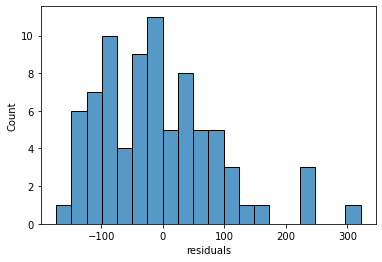

In [57]:
sns.histplot(comp['residuals'], bins=20)

Yukarıda fark ettiysek, **Normal Dağılım**'dan biraz sapmış. Pozitif tarafta biraz fazlalık var... Bunun da sebebi tahminlerimiz (predictions) biraz daha küçük değerler olmuş ki Gerçek (Actual) değerlerimiz pozitif tarafta biraz fazla birikmiş...
<br> Yani şu an bu modelimiz ile **;** biraz abartılı harcama yapan insanların harcamaları için, Gerçek olandan biraz daha küçük (under) tahminler yapıyoruz...

In [60]:
print( 'MAE : ' , metrics.mean_absolute_error(y_test , predictions) )
print( 'MSE : ' , metrics.mean_squared_error(y_test , predictions) )
print( 'RMSE : ' , np.sqrt(metrics.mean_squared_error(y_test , predictions)) )

MAE :  75.79118959094794
MSE :  9260.299220657227
RMSE :  96.23044851115071


**+--- NOTE ---> Mean Absolute Error 'MAE' :** Mutlak Değer içerisinde, tahminimizin gerçekten, ortalamada ne kadar saptığını gösterir.

Yani yukarıdaki metriklere bakarsak mesela **'MAE'** için ortalamada **75.79$**'lık bir **'Balance'** kolonunda sapma yapmışız. Yani, bu veri seti için kötü bir sonuç değil...

+ **Total Sum of Squares (TSS) :**

In [61]:
tss = np.sum((y_test - np.mean(y_test))**2)
tss

16056560.200000001

+ **Total Variance (Toplam Varyans) :**
<br> **'y'**'lerdeki toplam varyasyonu (varyansı) **;** yani **'y'**'nin, kendi ortalamasından ne kadar saptığını **;** yani **'y'**'nin ne kadar değişken olduğunu ifade eder **:**
<br> Yani **;** (**TSS / n) = Toplam varyans :**

In [62]:
tV = np.sum((y_test - np.mean(y_test))**2) / len(y_test)
tV

200707.0025

+ Ayrıca **'Mean Squared Errors' ;**
+ + **MSE = (SSE / n)**
+ **R Square ($R^2$)** ise **:**
+ + **$R^2$ = 1 - (SSE / TSS)**
+ + **$R^2$ = 1 - (MSE / Toplam Varyans)**

+ **$R^2$ = 1 - (MSE / Toplam Varyans) :**

In [65]:
R_Square = 1 - 9260.299220657227 / 200707.0025
R_Square

0.9538616037043489

In [67]:
metrics.r2_score(y_test, predictions)

0.9538616037043489

In [68]:
lm.score(X_test, y_test)

0.9538616037043489

Yukarıdaki **$R^2$** sonucu ile **;** Varyasyonun ne kadarını açıklayabildiğimizi görüyoruz... Yani bu modelimiz ile, **%95...** civarında açıklayabilmişiz... Bu gayet iyi bir sonuç... 

---
---
---
---

## Auto Data **:**

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [7]:
auto = pd.read_csv('Auto.csv')
auto.head(3)

,mpg,horsepower
0,18.0,130
1,15.0,165
2,18.0,150


+ Bu Veri Setinde **;**
+ + **mpg =** Miles Per Gallon. (1 Galon Benzin ile Gidilen Mil)
+ + **HP = horsepower =** Beygir Gücü.

In [24]:
#   Check data has been read in properly :
#   Verilerin doğru şekilde okunup okunmadığını kontrol edin :

auto = auto.sort_values(by='horsepower')
auto

,mpg,horsepower
19,26.0,46
101,26.0,46
324,43.4,48
323,44.3,48
242,43.1,48
...,...,...
6,14.0,220
8,14.0,225
94,12.0,225
13,14.0,225


**++++ Critical NOTE ++++**
<br> **``1_Auto__Milles-Per-Gallon__Hoursepower``** isimli **.JPG** resim dosyasına baktığımızda, bu Veri Seti için nasıl bir grafiğimizin olduğunu görebiliriz...
<br> Grafiğe bakarsak **;** araçların beygir gücü arttıkça, 1 galon benzin ile gidebildikleri mesafenin de azalma eğiliminde olduğunu görüyoruz.
<br> Grafikte Sarı renkte olan **Lineer Regresyon Modeli çizgisinin**, **Horsepower**'in çok düşük ve çok yüksek olduğu değerlerde biraz saçmaladığını görüyoruz. Çünkü o bölgelerde doğrusal (lineer) bir dağılım yok ve biraz EĞRİ'ye benzeyen bir veri dağılımı var gibi görünüyor...
<br> Yani beygir gücünün aslında, 1 Galon benzin ile gidilen mesafeye etkisinin **Lineer bir etki OLMADIĞINI** görüyoruz...
<br> Böyle bir durumda, mesela **POLINOM**'da **FIT** edebiliriz...
<br> **+--- NOTE --->** Polinom, **EN AZ 2. dereceden** bir denklemdir.
+ **Lineer** bir fonksiyon olarak **FIT** etmek isteseydik **:**
+ + **$mpg$ =** $\beta_{0}$ **+** ($\beta_{1}$ **.** $HorsePower$)
<br> yazmalıydık...
+ Ama **Polinom (non-linear)** bir şekilde **FIT** etmek istersek de fonksiyon, mesela **:**
+ + **$mpg$ =** $\beta_{0}$ **+** ($\beta_{1}$ **.** $HP$) **+** ($\beta_{2}$ **.** $HP^2$)
<br> şeklinde yazılmalıdır...
+ Bu **non-linear** olan modeli **FIT** edersek **;** şekli **, 2. dereceden bir polinom** şeklinde olacaktır...
<br> Ama bu modeli **FIT** etmek için çok da karmaşık şeyler yapmamıza gerek yok **!**
<br> Mesela yukarıdaki denklemde **;** $(HP)$ 'yi **$X_{1}$ ,** $(HP)^2$ 'yi de **$X_{2}$** olarak yazabiliriz... Yani bu yarattığımız **$X_{1}$** ve **$X_{2}$** 'yi birbirlerinden farklı birer değişkenlermiş gibi düşünebiliriz...
<br> Böyle yazarak denklemi kurduğumuzda da **,** sanki bir **'Linear Regression' Modeliymiş gibi** bir işlem yapmış oluyoruz... Ama sonunda yine bir NON-LINEAR model kurmuş oluyoruz...
<br> Yani **'Linear**' bir şekilde **FIT** ediyoruz ama **'Non-Linear' bir model** kurmuş oluyoruz **!**
+ Yani fonksiyonun yazımının yine **'Lineer'** bir şekilde olması için **:**
+ + **$mpg$ =** $\beta_{0}$ **+** ($\beta_{1}$ **.** $X_{1}$) **+** ($\beta_{2}$ **.** $X_{2}$)
<br> şeklinde de yazılabilir...


+ Yani biz diyoruz ki **;**
+ + İlk önce **'HorsePower'** kolonunu alalım, bir de yanına **her bir HP** değerinin **KARESİNİN** yazılı olduğu bir kolon yaratalım. En son da ne kadar yakıt harcadıklarını yani **'mpg'** kolonunu yazalım...
<br> **+--- NOTE ---> Scikit-Learn**'in **;** bu yeni yarattığımız kolonun, **HP** kolonunun **KARESİ** olduğunu bilmesine gerek yok. Zaten bilmiyor da... Biz bambaşka bir kolonmuş gibi yeni bir kolon yaratıyoruz. Ama bu kolon **HP kolonunun KARESİNİ** içeriyor... **Scikit-Learn ;** bir kolonu $X_{1}$ gibi **,** diğer kolonu da $X_{2}$ gibi düşünür geçer... Ve sonunda üreteceği model, bizim istediğimiz **polinom** bir model olmuş olur...
+ **+--- NOTE ---> İstersek 2. dereceden bir polinom şeklinde değil de, '3.' , '4.' , '5.' , ... dereceden bir polinom şeklinde de 'FIT' edebiliriz...** Yani mesela, **(HP)'nin küpünü, 4. dereceden kuvvetini, ...** flan da **modelimizin içerisine** koyabiliriz...
<br> **+--- NOTE --->** Modellerimiz karmaşıklaştıkça, yani polinom derecesi arttıkça daha KOMPLEX modeller yaratırız **!** Yani Veri'ye biraz daha oturan modeller yaratmış oluruz.
<br> **AMA** polinomun derecesini arttırdıkça, **OVERFITTING** riskini de arttırmış oluruz... Tabi bunun ideal noktasını **, VALIDATION** tekniği ile bulabiliriz...

+ **+--- NOTE --->** İllaki **'Karesi', 'Küpü', ...** şeklinde bir polinom modeli yaratmamıza gerek yok. Mesela **'$mpg$'**'nin değişimi **; $HP$**'nin **'$sinus$'**'ü ila alakalı da olabilir. O zaman da yapmamız gereken **:**
+ + **$mpg$ =** $\beta_{0}$ **+** ($\beta_{1}$ **.** $HP$) **+** ($\beta_{2}$ **.** $HP^2$) **+** ($\beta_{3}$ **.** $sin(HP)$)
+ + Yani **;**
<br> **$mpg$ =** $\beta_{0}$ **+** ($\beta_{1}$ **.** $X_{1}$) **+** ($\beta_{2}$ **.** $X_{2}$) **+** ($\beta_{2}$ **.** $X_{3}$) 
<br> şeklinde bir fonksiyon yaratmak olacaktır...
<br> Bu **sinüs, kosinüs, logaritma, ...** gibi **tüm matematiksel kavramlar olabilir**... Hepsini modelimize ekleyebiliriz...

**+--- ÖNEMLİ --->** Fonksiyonlarda gördüğümüz gibi **;** hiçbir şekilde **BETA ( $\beta$ )**'lar BİRBİRLERİ İLE **ÇARPILMIYORLAR !** Hepsi birbiri ile **TOPLANIYOR !** Bunun için biz bu modele hala, **LINEAR REGRESSION** modeli diyebiliyoruz...
<br> Yani **Linear Regression**'da **BETA ( $\beta$ )**'lar **;** **INPUT**'ları ( **$X_{1}$ , $X_{2}$ , ...** ) ile **çarpılıp**, sonra da **birbirleri ile toplanıyorlar**...

In [47]:
y = np.array(auto['mpg'])

x = np.array(auto['horsepower'])

In [48]:
x

array([ 46,  46,  48,  48,  48,  49,  52,  52,  52,  52,  53,  53,  54,
        58,  58,  60,  60,  60,  60,  60,  61,  62,  62,  63,  63,  63,
        64,  65,  65,  65,  65,  65,  65,  65,  65,  65,  65,  66,  67,
        67,  67,  67,  67,  67,  67,  67,  67,  67,  67,  67,  68,  68,
        68,  68,  68,  68,  69,  69,  69,  70,  70,  70,  70,  70,  70,
        70,  70,  70,  70,  70,  70,  71,  71,  71,  71,  71,  72,  72,
        72,  72,  72,  72,  74,  74,  74,  75,  75,  75,  75,  75,  75,
        75,  75,  75,  75,  75,  75,  75,  75,  76,  76,  76,  76,  77,
        78,  78,  78,  78,  78,  78,  79,  79,  80,  80,  80,  80,  80,
        80,  80,  81,  81,  82,  83,  83,  83,  83,  84,  84,  84,  84,
        84,  84,  85,  85,  85,  85,  85,  85,  85,  85,  85,  86,  86,
        86,  86,  86,  87,  87,  88,  88,  88,  88,  88,  88,  88,  88,
        88,  88,  88,  88,  88,  88,  88,  88,  88,  88,  88,  89,  90,
        90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  9

In [49]:
y

array([26. , 26. , 43.4, 44.3, 43.1, 29. , 29. , 32.8, 44. , 31. , 33. ,
       33. , 23. , 36. , 39.1, 35.1, 27. , 36.1, 38.1, 24.5, 32. , 29.8,
       37.7, 38. , 34.7, 30.5, 39. , 37.2, 34.1, 37. , 34.4, 40.8, 29.9,
       31. , 32. , 31.8, 46.6, 36.1, 30. , 31. , 31. , 38. , 32. , 38. ,
       26. , 36.4, 32.3, 33.8, 44.6, 30. , 34.1, 37. , 31. , 29.5, 31.5,
       30. , 26. , 35. , 37.3, 29. , 33.5, 39.4, 32. , 29. , 32.1, 34. ,
       36. , 34.5, 30. , 34.2, 26. , 25. , 29.5, 31.9, 31.5, 27.2, 15. ,
       15. , 22. , 26.5, 32.4, 21. , 36. , 31.6, 33. , 25. , 32.4, 33.7,
       26. , 32.2, 31.3, 30.9, 28. , 28. , 24. , 26. , 36. , 24. , 29. ,
       30. , 30.7, 41.5, 22. , 25.4, 18. , 34.3, 30.5, 23. , 26. , 29. ,
       28. , 26. , 27.4, 26. , 25. , 28. , 35.7, 28.1, 30. , 24. , 25. ,
       31. , 33.5, 29. , 27. , 23. , 29. , 36. , 26.6, 30. , 32. , 27.2,
       17.6, 20.2, 21. , 23.8, 19.8, 31. , 38. , 20.8, 19. , 22. , 28. ,
       21. , 27. , 23. , 25. , 21. , 26.4, 18. , 19

**++++ Critical NOTE ++++**
+ Reshape your data either using **array.reshape(-1, 1)** if your data has a single feature or **array.reshape(1, -1)** if it contains a single sample **:**
+ Veri Setimiz **tek bir Feature**'ye (Yani **tek bir 'X' kolonuna**) sahip ise **; array.reshape(-1, 1)** veya **tek bir örnek** içeriyorsa **array.reshape(1, -1)** kullanarak verilerimizi yeniden şekillendirmemiz gerekir. Aksi halde **FIT** ederken hata alırız **:**
+ + **+--- NOTE ---> Scikit-Learn Kütüphanesi, 'x'** olarak yolladığımız değeri bir MATRİS olarak İSTER **! 'x'**'ler illaki MATRIS OLACAK **!**
<br> Ama yukarıda veriyi **'x'** ve **'y'** diye parçaladığımızda, **'x' tek kolonlu (tek boyutlu)** olduğu için **bir 'Matris' olmadı ve 'Numpy Array'** haline geldi **(Yukarıda fark ettiysek zaten, TEK Köşeli Parantez var)**.
<br> **``.reshape( , )``** fonksiyonu ile **; 'x'** kolonunu, **tek bir kolonu olan bir MATRIS** haline dönüştürmemiz gerekiyor **:**

In [86]:
y = np.array(auto['mpg'])

x = np.array(auto['horsepower']).reshape(-1 , 1)

---
---
--------->
### **Modelimizi Yaratalım (Kuralım) :**
<---------

---
---

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures

+ Öncelikle Veri Seti'ni **TRAIN** ve **TEST** olarak iki parçaya ayıralım **:**

In [110]:
X_train, X_test, y_train, y_test = train_test_split(x , y , test_size=0.2 , random_state=10)

In [111]:
model = LinearRegression()

model.fit(X_train , y_train)

LinearRegression()

+ **Tahminlemeyi ; TEST için ayırdığımız** Veri Seti üzerinde yapmaya çalışıyoruz **:**

In [112]:
y_pred = model.predict(X_test)

+ Şimdi de **TEST**'deki performansımıza ve HATA'lara bakmak için, **'MSE'** ve $R^2$ **metriklerini** çağırıyoruz **:**

In [113]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)

print('MSE : ' , mse)
print('R^2 : ' , r2)

MSE :  25.146932961221157
R^2 :  0.5901354629851379


#### Yukarıda gördüğümüz gibi, **$R^2$** değerimiz pek iyi değil. Varyansın ancak **%59...**'unu flan açıklayabiliyor... Demekki bu kurduğumuz model pek de iyi bir model değil... Bir şeyleri düzeltmemiz veya modeli tamamen değiştirmemiz lazım... **:**

+ **'PolynomialFeatures'** modülünü çağırıyoruz **:**

In [117]:
from sklearn.preprocessing import PolynomialFeatures

+ Şimdi, TRAIN ve TEST olarak ayırdığımız Veri Setleri üzerinde **POLİNOM** üreterek bir model kurmaya çalışalım **:**
<br> Polinomu **;** **'X' TRAIN Set** üzerinden **FIT**'leyeceğiz (**Eğiteceğiz**)... Sonra da **'X' TEST Set** üzerinden **testini** yapacağız... **:**
+ Öncelikle, **4. dereceden bir Polinom üretelim :**

In [102]:
polynomial_features = PolynomialFeatures(degree=4 , include_bias=False)

+ TRAIN Set'in **4. dereceden Polinomunu** üretelim **:**
<br> Yani, **'X'**'lerin **TRAIN Set**'ini alacak **; kendisini, karelerini, küplerini ve dördüncü dereceden kuvvetlerini ; her biri ayrı birer kolon olacak şekilde üretecek :**

In [ ]:
X_poly_train = polynomial_features.fit_transform(X_train)

+ TEST Set'in **4. dereceden Polinomunu** üretelim **:**
<br> Yani, **'X'**'lerin **TEST Set**'ini alacak **; kendisini, karelerini, küplerini ve dördüncü dereceden kuvvetlerini; her biri ayrı birer kolon olacak şekilde üretecek :**

In [104]:
X_poly_test = polynomial_features.fit_transform(X_test)

In [101]:
X_poly_train

array([[6.7000000e+01, 4.4890000e+03, 3.0076300e+05, 2.0151121e+07],
       [6.7000000e+01, 4.4890000e+03, 3.0076300e+05, 2.0151121e+07],
       [1.9000000e+02, 3.6100000e+04, 6.8590000e+06, 1.3032100e+09],
       ...,
       [9.5000000e+01, 9.0250000e+03, 8.5737500e+05, 8.1450625e+07],
       [1.0000000e+02, 1.0000000e+04, 1.0000000e+06, 1.0000000e+08],
       [9.5000000e+01, 9.0250000e+03, 8.5737500e+05, 8.1450625e+07]])

+ **Modelimizi kurarken (FIT ederken) her zamanki gibi TRAIN SET'i kullanacağız..!** Ama bu defa **Polynomial** şeklinde olacak...
<br> Sonra da **Tahminleme yaparken de, yine her zamanki gibi TEST Set'ini kullanacağuz...!** Ama yine bu da **Polynomial** şeklinde olacak...
<br> Çünkü artık, model 4 tane ayrı Feature (kolon) alacak. Bunlar da $X^1$ , $X^2$ , $X^3$ , $X^4$ kolonlarıdır.
<br> **+--- NOTE ---> $X^0$** Feature'sini (kolonunu) almamasının sebebi de **;** yukarıda **PolynomialFeatures( )** oluştururken, **(include_bias=False)** komutunu yazmamızdır... (Zaten **$X^0$** değeri otomatik olarak **'1'**'dir...)

In [106]:
polymodel = LinearRegression()

polymodel.fit(X_poly_train, y_train)

y_poly_pred = polymodel.predict(X_poly_test)

Yukarıda, **Tahminleme (Prediction yaparken)**, doğrudan **'X_test'** Veri Seti'ni yollasaydık program çalışmazdı... Çünkü **X_test** Veri Seti'nin kolon sayısı ile, programın beklediği kolon sayısı aynı değil. **X_test Veri Seti'nin kolon sayısı '1', programın beklediği kolon sayısı ise '4'**'dür.

+ Şimdi de artık YENİ MODELİMİZ için; **'MSE'** ve **$R^2$ metriklerini** hesaplayalım **:**
<br> Bu hesaplamaları da **:**
<br> **'y' GERÇEK TEST Veri Seti (y_test)** ile **; üretmiş olduğumuz 'y' TAHMİN Veri Seti (y_poly_pred)** arasındaki **FARKLARA** bakarak yapacağız **:**

In [114]:
from sklearn.metrics import mean_squared_error , r2_score

mse = mean_squared_error(y_test , y_poly_pred)
r2 = r2_score(y_test , y_poly_pred)

print(mse)
print(r2)

18.78994786938856
0.6937466172953779


**+--- NOTE --->** Burada performansa bakarken TEST Veri Setini kullandık ama istersek TRAIN veri setinde de performansa bakabiliriz...

**++++ NOTE ++++**
<br> **Tahminleme** fonksiyonu olan **.predict( )** fonksiyonunun içerisine; sadece Veri Seti değil, **MATRİS** de yollayabiliriz. Mesela **.predict(X_test[0])** şeklinde de bir tahminleme yapabiliriz... Yani buradaki örneğe bakarsak, **X_test** Veri Seti'nin yapısı (structure)'si ne ise, aynı yapıda yolladığımız her şeye tahminleme yapabiliriz. Yani içerisine, Veri Seti'nin INPUT'larını koyduğumuz an tahminleme yapar.
<br> **+--- NOTE --->** Model zaten daha öncesinde **FIT edilerek (Eğitilerek),** katsayılarını ve parametrelerini buldu. **Bu tahmin dediğimiz şey de, Modeli kullanarak bir değer üretmektir.**

---
---
--------->
+ **Linear Regression , _'Polynomial Features'_ Modeli için Sırası ile :**
+ + **pd.read_...( " " , )** fonksiyonu ile Veri Setimizi **çağırıyoruz ,**
+ + Veri Setimizi **düzenliyoruz.** Eksik ve gereksiz verileri, kolonları, satırları, ... bulup üzerlerinde düzeltmeler yapıyoruz **,**
+ + **Numpy, Pandas, Matplotlib ve Seaborn** kütüphaneleri ile veri setimizi **gözlemleyip, yorumlar yapıyoruz ,**
+ + Veri Setimizin **kolonları arasındaki 'Korelasyonlara'** bakıyoruz **:** ( **df.corr()** ) **,**
+ + **'X'**'leri ve **'y'**'leri (yani **FEATURE ve TARGET** kolonlarını) birbirlerinden **ayırıyoruz ,**
+ + Veri Setini **;** ( **X_train , X_test , y_train , y_test** ) olarak **parçalamak** için **:**
+ + + Öncelikle **modülünü çağırmamız** gerekiyor **:** ( **from sklearn.model_selection import train_test_split** ) **,**
+ + + Sonra da **TRAIN - TEST** diye **parçalamak** için **:** ( **X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=... , random_state=... )** ) **.**
+ + **Feature'lerimizi ('X' kolonlarımızı); Polynomial** hale getirmek için, **'PolynomialFeatures'** modülünü **çağırıyoruz :** ( **from sklearn.preprocessing import PolynomialFeatures** ) **;**
+ + TRAIN ve TEST olarak ayırdığımız Veri Setlerinden **; Feature ('X')** kolon veya kolonları için **POLİNOM** üreterek bir model kuruyoruz **:** ( **polynomial_features = PolynomialFeatures(degree=... , include_bias=...)** ) **,**
+ + **.fit_transform(X)** metodu ile **; 'X'**'i al ve **Polinomu FIT et** demek istiyoruz... Yani **'X'**'in **Polinom Derecelerini** üretiyoruz. Yani **'X'**'in her **kuvvet derecesi** için ayrı bir Kolon (Feature) üretiyoruz...
<br> Burada da **'X'**'i (**Feature'leri**), TRAIN ve TEST olarak ayırdığımız **; 'X_train'** ve **'X_test'** Veri Setlerinin, ayrı ayrı her **kuvvetleri** için **Polinom Dereceleri** üretiyoruz **:**
+ + + + ( **X_poly_train = polynomial_features.fit_transform(X_train)** ) **,**
+ + + + Ve **,** ( **X_poly_test = polynomial_features.fit_transform(X_test)** ) **.**
+ + **Polynomial Model** için bir **OBJE** atıyoruz. Yani modeli **kuruyoruz** **:** ( **polymodel = LinearRegression()** ) **,**
+ + **TRAIN** Veri Setleri'ni **FIT** ediyoruz. Yani artık **Modelimizi Eğitiyoruz :** ( **polymodel.fit(X_poly_train, y_train)** ) **,**
+ + Bir yukarıda Eğittiğimiz (FIT ettiğimiz) TRAIN Veri Setlerindeki **coefficient (katsayı)**'ları da kullanarak **;** yine **Polynomial** olarak yarattığımız **'X_poly_test'** Veri Seti üzerinde bir **Tahmin (Prediction)** yapıyoruz **:** ( **y_poly_pred = polymodel.predict(X_poly_test)** ) **,**
+ + Programımızın **performansını** ölçmek için **Hata**'lara bakmamız gerekiyor... Bunun için de **Hata Metrik**'lerini çağırıyoruz **:** ( **from sklearn.metrics import mean_squared_error , r2_score** ) **,**
+ + Hata Metrik'lerinden de öncelikli olarak **'MSE'** ve **'$R^2$'** metriklerine bakıyoruz **:**
+ + + + ( **mse = mean_squared_error(y_test , y_poly_pred)** ) **,**
+ + + + ( **r^2 = r2_score(y_test , y_poly_pred)** ) **.**
+ + + **+--- NOTE --->** Burada performansa bakarken **TEST** Veri Setini kullandık ama istersek **TRAIN** veri setinde de performansa bakabiliriz...

<---------

---
---